In [2]:
import numpy as np
import pandas as pd
import plotly.express as px

color = px.colors.sequential.Rainbow[::-1]
marker_size = 2

def plot_3D (exp_name , depth_axis):
    my_sample_x = np.loadtxt("3D_Experements/"+exp_name+"_x.txt")
    my_sample_y = np.loadtxt("3D_Experements/"+exp_name+"_y.txt")
    my_sample_z = np.loadtxt("3D_Experements/"+exp_name+"_z.txt")
    df = pd.DataFrame(my_sample_x,columns=['X (mm)'])
    df['Y (mm)'] = my_sample_y
    df['Z (mm)'] = my_sample_z
    df.head()
    min_depth = 0
    max_depth = 0
    if depth_axis == 'x':
        df['Depth'] = my_sample_x
        max_depth = np.amax(my_sample_x)
        min_depth = np.amin(my_sample_x)

    elif depth_axis == 'y':
        df['Depth'] = my_sample_y
        max_depth = np.amax(my_sample_y)
        min_depth = np.amin(my_sample_y)

    elif depth_axis == 'z':
        df['Depth'] = my_sample_z
        max_depth = np.amax(my_sample_z)
        min_depth = np.amin(my_sample_z)
        

    else:
        print("invalid depth axis")
        return

    fig = px.scatter_3d(df, x='X (mm)', y='Y (mm)', z='Z (mm)', color='Depth', title="ٌRadar Point Cloud" , range_color=[min_depth,max_depth],color_continuous_scale=color , opacity=1)
    fig.update_traces(marker=dict(size=marker_size, line=dict(width=0))) 
    fig.show()



In [3]:
import numpy as np
import pandas as pd
import plotly.express as px

color = px.colors.sequential.Rainbow[::-1]
marker_size = 2

def plot_3D (exp_name , depth_axis):
    dist = np.loadtxt("3D_Experements/"+exp_name+"_x.txt")
    upper_angle = np.loadtxt("3D_Experements/"+exp_name+"_y.txt")
    lower_angle = np.loadtxt("3D_Experements/"+exp_name+"_z.txt")

    # print("print upper_angle = "+upper_angle)
    #x , y , z = np.array(dist)*np.cos(uAngel)*np.sin(lAngel) , np.array(dist)*np.cos(uAngel)*np.cos(lAngel) , np.array(dist)*np.sin(uAngel)

    my_sample_x = np.array(dist)*np.cos(upper_angle)*np.sin(lower_angle)
    my_sample_y =  np.array(dist)*np.cos(upper_angle)*np.cos(lower_angle)
    my_sample_z =  np.array(dist)*np.sin(upper_angle)

    df = pd.DataFrame(my_sample_x,columns=['X (mm)'])
    df['Y (mm)'] = my_sample_y
    df['Z (mm)'] = my_sample_z
    df.head()
    min_depth = 0
    max_depth = 0
    if depth_axis == 'x':
        df['Depth'] = my_sample_x
        max_depth = np.amax(my_sample_x)
        min_depth = np.amin(my_sample_x)

    elif depth_axis == 'y':
        df['Depth'] = my_sample_y
        max_depth = np.amax(my_sample_y)
        min_depth = np.amin(my_sample_y)

    elif depth_axis == 'z':
        df['Depth'] = my_sample_z
        max_depth = np.amax(my_sample_z)
        min_depth = np.amin(my_sample_z)
        

    else:
        print("invalid depth axis")
        return
   

    fig = px.scatter_3d(df, x='X (mm)', y='Y (mm)', z='Z (mm)', color='Depth', title="ٌRadar Point Cloud" , range_color=[min_depth-200,max_depth+200],color_continuous_scale=color , opacity=1)
    fig.update_traces(marker=dict(size=marker_size, line=dict(width=0))) 
    fig.show()



# 1 ) Corner mapping experement
![title](img/corner.jpg)


In [ ]:
plot_3D("3D_corner",'y')
plot_3D("3D_corner",'z')

In [ ]:
plot_3D("3D_corner(1)",'y')
plot_3D("3D_corner(1)",'z')

# 2 ) Cylinder mapping experement
![title](img/cylinder.jpg)


In [ ]:
plot_3D("3D_cylinder",'y')
plot_3D("3D_cylinder",'z')

In [ ]:
plot_3D("3D_cylinder(1)",'y')
plot_3D("3D_cylinder(1)",'z')

# 3 ) Body mapping experement
![title](img/ezzat_body.jpg)


In [ ]:
plot_3D("3D_ezzat_body",'y')
plot_3D("3D_ezzat_body",'z')

# 4 ) Face mapping experement
![title](img/ezzat_face.jpg)


In [ ]:
plot_3D("3D_ezzat_face",'y')
plot_3D("3D_ezzat_face",'z')

In [ ]:
plot_3D("waleed_face",'y')
plot_3D("waleed_face",'z')

In [ ]:
plot_3D("wall",'y')
plot_3D("wall",'z')

In [ ]:
#50
plot_3D("wall1",'y')
plot_3D("wall1",'z')

In [ ]:
#50
plot_3D("wall2",'y')
plot_3D("wall2",'z')

In [ ]:
#50
plot_3D("wall4",'y')
# plot_3D("wall4",'z')

In [ ]:
#50
plot_3D("wall4d",'y')
plot_3D("wall4d",'z')

In [ ]:
#50
plot_3D("wall7",'y')
plot_3D("wall7",'z')

In [ ]:
plot_3D("hello3",'y')
plot_3D("hello3",'z')

In [15]:
import numpy as np
from plotly import offline
from plotly import graph_objs as go
import torch
from PIL import Image
import plotly.express as px
import cv2
import pandas as pd
import matplotlib.pyplot as plt
color = px.colors.sequential.Rainbow[::-1]
marker_size = 3

def points_to_image(exp_name,threshold):
    dist = np.loadtxt("3D_Experements/"+exp_name+"_x.txt")
    upper_angle = np.loadtxt("3D_Experements/"+exp_name+"_y.txt")
    lower_angle = np.loadtxt("3D_Experements/"+exp_name+"_z.txt")

    print(np.amax(upper_angle*180/np.pi))
    print(np.amin(upper_angle*180/np.pi))
    print(np.amax(lower_angle*180/np.pi))
    print(np.amin(lower_angle*180/np.pi))
    

    #x , y , z = np.array(dist)*np.cos(uAngel)*np.sin(lAngel) , np.array(dist)*np.cos(uAngel)*np.cos(lAngel) , np.array(dist)*np.sin(uAngel)

    my_sample_x = np.array(dist)*np.cos(upper_angle)*np.sin(lower_angle)
    my_sample_y =  np.array(dist)*np.cos(upper_angle)*np.cos(lower_angle)
    my_sample_z =  np.array(dist)*np.sin(upper_angle)
    
    my_sample_x = my_sample_x[~np.isnan(my_sample_x)]
    my_sample_y = my_sample_y[~np.isnan(my_sample_y)]
    my_sample_z = my_sample_z[~np.isnan(my_sample_z)]

    
    min_depth = np.amin(my_sample_y)
    max_depth = (min_depth + threshold)
    indx = my_sample_y <= (min_depth + threshold)

    my_sample_x = my_sample_x[indx]
    my_sample_y = my_sample_y[indx]
    my_sample_z = my_sample_z[indx]
    
   
    
    
    
    
    
    my_sample_y = 1-  my_sample_y / np.max(my_sample_y)
    

    x_min = np.min(my_sample_x)
    x_max = np.max(my_sample_x)
    y_min = np.min(my_sample_y)
    y_max = np.max(my_sample_y)
    z_min = np.min(my_sample_z)
    z_max = np.max(my_sample_z)
    width = 1+(x_max - x_min).astype(int)
    hight = 1+(z_max - z_min).astype(int)

    # my_sample_y = my_sample_y + (1-y_max)
    print("img :: ",width,hight)
    img = np.zeros((width,hight))
    
    for i in range(len(my_sample_x)):
        x = (my_sample_x[i] - x_min).astype(int)
        z = (my_sample_z[i] - z_min).astype(int)
#         print("x,z :: ",x,z)
        img[x,z] = my_sample_y[i]
        
#     img = Image.fromarray(img)
    print(len(my_sample_x))
    
    kernel = np.ones((5,5), np.uint8)
 
    # The first parameter is the original image,
    # kernel is the matrix with which image is
    # convolved and third parameter is the number
    # of iterations, which will determine how much
    # you want to erode/dilate a given image.
    img_erosion = cv2.erode(img, kernel, iterations=1)
    img_dilation = cv2.dilate(img, kernel, iterations=5)

    cv2.imshow('Input', img)
    cv2.imshow('Erosion', img_erosion)
    cv2.imshow('Dilation', img_dilation)

    cv2.waitKey(0)
#     img.show()
    
def plot_3D (exp_name , depth_axis):
    dist = np.loadtxt("3D_Experements/"+exp_name+"_x.txt")
    upper_angle = np.loadtxt("3D_Experements/"+exp_name+"_y.txt")
    lower_angle = np.loadtxt("3D_Experements/"+exp_name+"_z.txt")

    print(np.amax(upper_angle*180/np.pi))
    print(np.amin(upper_angle*180/np.pi))
    print(np.amax(lower_angle*180/np.pi))
    print(np.amin(lower_angle*180/np.pi))
    

    #x , y , z = np.array(dist)*np.cos(uAngel)*np.sin(lAngel) , np.array(dist)*np.cos(uAngel)*np.cos(lAngel) , np.array(dist)*np.sin(uAngel)

    my_sample_x = np.array(dist)*np.cos(upper_angle)*np.sin(lower_angle)
    my_sample_y =  np.array(dist)*np.cos(upper_angle)*np.cos(lower_angle)
    my_sample_z =  np.array(dist)*np.sin(upper_angle)
    
    my_sample_x = my_sample_x[~np.isnan(my_sample_x)]
    my_sample_y = my_sample_y[~np.isnan(my_sample_y)]
    my_sample_z = my_sample_z[~np.isnan(my_sample_z)]

    df = pd.DataFrame(my_sample_x,columns=['X (mm)'])
    df['Y (mm)'] = my_sample_y
    df['Z (mm)'] = my_sample_z
    df.head()
    min_depth = 0
    max_depth = 0
    if depth_axis == 'x':
        df['Depth'] = my_sample_x
        max_depth = np.amax(my_sample_x)
        min_depth = np.amin(my_sample_x)

    elif depth_axis == 'y':
        df['Depth'] = my_sample_y
        max_depth = np.amax(my_sample_y)
        min_depth = np.amin(my_sample_y)

    elif depth_axis == 'z':
        df['Depth'] = my_sample_z
        max_depth = np.amax(my_sample_z)
        min_depth = np.amin(my_sample_z)
        

    else:
        print("invalid depth axis")
        return
   

    fig = px.scatter_3d(df, x='X (mm)', y='Y (mm)', z='Z (mm)', color='Depth', title="ٌRadar Point Cloud" , range_color=[min_depth-200,max_depth+200],color_continuous_scale=color , opacity=1)
    fig.update_traces(marker=dict(size=marker_size, line=dict(width=0))) 
    fig.show()
    
    
def plot_3D_threshold (exp_name ,folder_indx , depth_axis ,threshold):
    folder = ["3D_Experements", "flat_Experements"]
    dist = np.loadtxt(folder[folder_indx]+"/"+exp_name+"_x.txt")
    upper_angle = np.loadtxt(folder[folder_indx]+"/"+exp_name+"_y.txt")
    lower_angle = np.loadtxt(folder[folder_indx]+"/"+exp_name+"_z.txt")

    print(np.amax(upper_angle*180/np.pi))
    print(np.amin(upper_angle*180/np.pi))
    print(np.amax(lower_angle*180/np.pi))
    print(np.amin(lower_angle*180/np.pi))
    

    #x , y , z = np.array(dist)*np.cos(uAngel)*np.sin(lAngel) , np.array(dist)*np.cos(uAngel)*np.cos(lAngel) , np.array(dist)*np.sin(uAngel)

    my_sample_x = np.array(dist)*np.cos(upper_angle)*np.sin(lower_angle)
    my_sample_y =  np.array(dist)*np.cos(upper_angle)*np.cos(lower_angle)
    my_sample_z =  np.array(dist)*np.sin(upper_angle)
    my_sample_x = my_sample_x[~np.isnan(my_sample_x)]
    my_sample_y = my_sample_y[~np.isnan(my_sample_y)]
    my_sample_z = my_sample_z[~np.isnan(my_sample_z)]

    df = pd.DataFrame()
    
    indx = []
    min_depth = 0
    max_depth = 0
    if depth_axis == 'x':
        min_depth = np.amin(my_sample_x)
        max_depth = (min_depth + threshold)
        indx = my_sample_x<= (min_depth + threshold)
        df['Depth'] = my_sample_x[indx]

    elif depth_axis == 'y':
        min_depth = np.amin(my_sample_y)
        max_depth = (min_depth + threshold)
        indx = my_sample_y <= (min_depth + threshold)
#         print(my_sample_y , (min_depth + threshold))
#         print(type(my_sample_y),type(my_sample_y[indx]))
        df['Depth'] = my_sample_y[indx]

    elif depth_axis == 'z':
        min_depth = np.amin(my_sample_z)
        max_depth = (min_depth + threshold)
        indx = my_sample_z<= (min_depth + threshold)
        df['Depth'] = my_sample_z[indx]
        

    else:
        print("invalid depth axis")
        return
    df['X (mm)'] = my_sample_x[indx]
    df['Y (mm)'] = my_sample_y[indx]
    df['Z (mm)'] = my_sample_z[indx]
    df.head()
   

    fig = px.scatter_3d(df, x='X (mm)', y='Y (mm)', z='Z (mm)', color='Depth', title="ٌRadar Point Cloud" , range_color=[min_depth-100,max_depth+100],color_continuous_scale=color , opacity=1)
    fig.update_traces(marker=dict(size=marker_size, line=dict(width=0))) 
    fig.show()


def plot_2D (exp_name):
    dist = np.loadtxt("3D_Experements/"+exp_name+"_x.txt")
    upper_angle = np.loadtxt("3D_Experements/"+exp_name+"_y.txt")
    lower_angle = np.loadtxt("3D_Experements/"+exp_name+"_z.txt")

    print(np.amax(upper_angle*180/np.pi))
    print(np.amin(upper_angle*180/np.pi))
    print(np.amax(lower_angle*180/np.pi))
    print(np.amin(lower_angle*180/np.pi))
    

    #x , y , z = np.array(dist)*np.cos(uAngel)*np.sin(lAngel) , np.array(dist)*np.cos(uAngel)*np.cos(lAngel) , np.array(dist)*np.sin(uAngel)

    my_sample_x = np.array(dist)*np.cos(upper_angle)*np.sin(lower_angle)
    my_sample_y =  np.array(dist)*np.cos(upper_angle)*np.cos(lower_angle)
    my_sample_z =  np.array(dist)*np.sin(upper_angle)

    minx = np.min(my_sample_x)
    miny = np.min(my_sample_y)
    minz = np.min(my_sample_z)

    maxx = np.max(my_sample_x)
    maxy = np.max(my_sample_y)
    maxz = np.max(my_sample_z)

    # img =np.zeros(int(maxx-minx),int(maxz-minz))
    # img =np.zeros((int(maxx-minx),int(maxz-minz)), dtype=np.float64)
    # img =np.zeros(len(my_sample_x),len(my_sample_z)), dtype=np.float64)

    # for i in range(len(my_sample_x) - 1):
    #     img[int(my_sample_x[i] - minx -1)][int(my_sample_z[i] - minz -1)] = (my_sample_y[i] / maxy)*255
    
    trace = go.Surface(x = my_sample_x, y = my_sample_y, z =my_sample_z )
    data = [trace]
    layout = go.Layout(title = '3D Surface plot')
    fig = go.Figure(data = data)
    plot(fig)
    offline.init_notebook_mode(connected=False)

    df3 = {'x':[1, 2, 3, 4, 5],'y':[10, 20, 30, 40, 50],'z': [[5, 4, 3, 2, 1]]*5}
    offline.iplot(dict(data=[go.Surface(x=df3['x'], y=df3['y'], z=df3['z'])]))

def plot_var(threshold):
    exp_p = ["gedo_14_7",
             "waleed_14_7",
             "ta7a_14_7",
             "nassar_14_7"]

    exp_n = ["metal_dish",
            "painting"]

    var_all = []
    count = 0
    color = []

    for i in range(len(exp_p)):
        for j in range(1000):
            exp_name = exp_p[i] + "_" + str(j)
            dist = np.loadtxt("3D_Experements/"+exp_name+"_x.txt")
            upper_angle = np.loadtxt("3D_Experements/"+exp_name+"_y.txt")
            lower_angle = np.loadtxt("3D_Experements/"+exp_name+"_z.txt")
            my_sample_y =  np.array(dist)*np.cos(upper_angle)*np.cos(lower_angle)

            min_depth = np.amin(my_sample_y)
            max_depth = (min_depth + threshold)
            indx = my_sample_y <= (min_depth + threshold)
            my_sample_y = my_sample_y[indx]
            var_all.append(np.var(my_sample_y))
            count+=1
            color.append(0)
            # print(count)

    
    for i in range(len(exp_n)):
        for j in range(1000):
            exp_name = exp_n[i] + "_" + str(j)
            dist = np.loadtxt("flat_Experements/"+exp_name+"_x.txt")
            upper_angle = np.loadtxt("flat_Experements/"+exp_name+"_y.txt")
            lower_angle = np.loadtxt("flat_Experements/"+exp_name+"_z.txt")
            my_sample_y =  np.array(dist)*np.cos(upper_angle)*np.cos(lower_angle)
            # var_all.append(np.var(my_sample_y))

            min_depth = np.amin(my_sample_y)
            max_depth = (min_depth + threshold)
            indx = my_sample_y <= (min_depth + threshold)
            my_sample_y = my_sample_y[indx]
            var_all.append(np.var(my_sample_y))
            color.append(1)
            count+=1
            # print(count)

    x = [num for num in range(0, len(var_all), 1)]
    # a = np.array([x,var_all])

    categories = np.array(color)

    colormap = np.array(['g', 'r'])

    plt.scatter(np.array(x), np.array(var_all), s=100, c=colormap[categories])

    # plt.savefig('ScatterClassPlot.png')
    # plt.show()
     
    
    # plt.plot(x, var_all,'o',color = color)
    plt.xlabel('X')
    plt.ylabel('var')
    plt.grid(True)

    plt.plot()


def plot_hist(exp_name,folder_indx):
    folder = ["3D_Experements", "flat_Experements"]
    dist = np.loadtxt(folder[folder_indx]+"/"+exp_name+"_x.txt")
    upper_angle = np.loadtxt(folder[folder_indx]+"/"+exp_name+"_y.txt")
    lower_angle = np.loadtxt(folder[folder_indx]+"/"+exp_name+"_z.txt")

    my_sample_y =  np.array(dist)*np.cos(upper_angle)*np.cos(lower_angle)
    plt.hist(my_sample_y , bins = [i for i in range(200,800,10)]) 
    plt.title("histogram") 
    plt.show()  

    

    


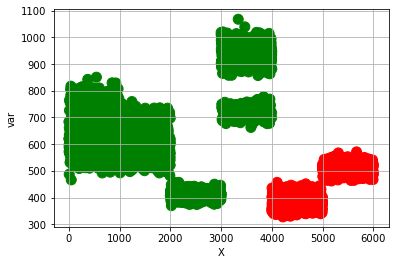

In [2]:
plot_var(100)

13.5
-13.5
17.1
-18.0


13.5
-13.5
17.1
-18.0


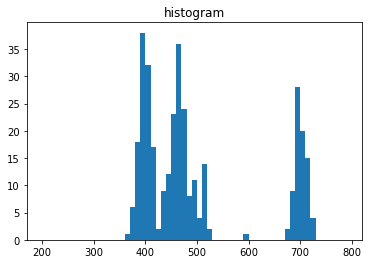

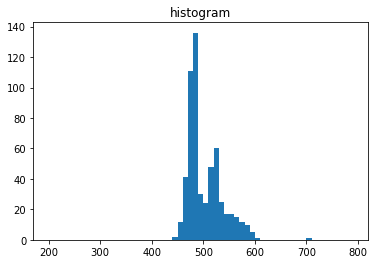

In [16]:
# plot_3D("waleed2_12_7",'y')\
plot_3D_threshold("ta7a_14_7_20",0,'y',100000)
plot_3D_threshold("metal_dish_20",1,'y',1000000)
# points_to_image("ta7a_14_7_20",90)
plot_hist("nassar_14_7_20",0)
plot_hist("painting_20",1)

In [2]:
import numpy as np
import pyvista as pv

folder_indx = 0 
exp_name = ""
folder = ["3D_Experements", "flat_Experements"]
dist = np.loadtxt(folder[folder_indx]+"/"+exp_name+"_x.txt")
upper_angle = np.loadtxt(folder[folder_indx]+"/"+exp_name+"_y.txt")
lower_angle = np.loadtxt(folder[folder_indx]+"/"+exp_name+"_z.txt")



    #x , y , z = np.array(dist)*np.cos(uAngel)*np.sin(lAngel) , np.array(dist)*np.cos(uAngel)*np.cos(lAngel) , np.array(dist)*np.sin(uAngel)

my_sample_x = np.array(dist)*np.cos(upper_angle)*np.sin(lower_angle)
my_sample_y =  np.array(dist)*np.cos(upper_angle)*np.cos(lower_angle)
my_sample_z =  np.array(dist)*np.sin(upper_angle)
my_sample_x = my_sample_x[~np.isnan(my_sample_x)]
my_sample_y = my_sample_y[~np.isnan(my_sample_y)]
my_sample_z = my_sample_z[~np.isnan(my_sample_z)]

points = np.concatenate((my_sample_x, my_sample_y, my_sample_z), axis=0)
print(points, point.shape)
# points is a 3D numpy array (n_points, 3) coordinates of a sphere
# cloud = pv.PolyData(points)
# cloud.plot()

# volume = cloud.delaunay_3d(alpha=2.)
# shell = volume.extract_geometry()
# shell.plot()

ModuleNotFoundError: No module named 'vtkCommonCorePython'